In [2]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
import seaborn as sns

### Configuraciones librerias

In [3]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [4]:
TAM_TITULO = 35
TAM_ETIQUETA = 30
COLORES_BARRAS = 'colorblind'

### Funciones auxiliares

#### Graficos

In [5]:
font_size = 18

def crear_mapa(series, caracteristica, vmin, vmax, titulo, titulo_barra, color):
    #Creo mi mapa de mexico
    mexico = geopandas.read_file('Data/mexstates.shp') #Los estados pueden ser vistos con mexico.ADMIN_NAME

    #Le pongo los tildes al archivo de estados para que me coincidan con las provincias
    mexico["ADMIN_NAME"].replace({'Nuevo Leon': "Nuevo León",
                               "San Luis Potosi": "San luis Potosí",
                               "Queretaro": "Querétaro",
                               "Yucatan": "Yucatán",
                               "Michoacan": "Michoacán",
                               "Mexico": "Edo. de México",
                               "Baja California": "Baja California Norte"}, inplace=True)

    #Hago un nuevo dataframe con la información del mapa y la antiguedad para cada provincia
    gdf = mexico.set_index("ADMIN_NAME").join(series)
    
    #Grafico el mapa

    #Base donde se va a dibujar
    fig, base = plt.subplots(1, figsize=(10, 6))

    #Si les parece que los ejes están de más, pongan off
    base.axis("on")

    #Pido que me coloreé en base a la caracteristica determinada
    gdf.plot(column=caracteristica, cmap=color, linewidth=0.8, ax=base, edgecolor="0.8")

    #Setteo el título al gráfico
    base.set_title(titulo, fontsize = font_size)
    
    #Agrego la barra que indica la antiguedad
    # l:left, b:bottom, w:width, h:height
    cbax = fig.add_axes([1, 0.15, 0.02, 0.65])   
    cbax.set_title(titulo_barra)
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, cax=cbax)

def crear_plot(data, x, y, caracteristica, paleta, titulo, titulo_barra, xlabel, ylabel):
    grafico = sns.barplot(
        x = x, 
        hue = caracteristica,
        y = y,
        data = data,
        palette = paleta
    )
    grafico.set_title(titulo, fontsize = TAM_TITULO)
    grafico.set_xlabel(xlabel, fontsize = TAM_ETIQUETA)
    grafico.set_ylabel(ylabel, fontsize = TAM_ETIQUETA)
    grafico.legend(title = titulo_barra)
    plt.show()

#### Otras funciones

In [6]:
def crear_df_precio_caracteristica_boolean(df, caracteristica):
    provincias = df["provincia"].unique()
    
    df_caracteristica_true = df[df[caracteristica] == True]
    df_caracteristica_false = df[df[caracteristica] == False]
    
    precio_caracteristica_true = df_caracteristica_true.groupby("provincia")["precio"].mean()
    precio_caracteristica_false = df_caracteristica_false.groupby("provincia")["precio"].mean()
    
    provincias_col = []
    boolean = []
    precio = []
    
    for provincia in provincias:
        #Para verdadero
        provincias_col.append(provincia)
        boolean.append(True)
        precio.append(precio_caracteristica_true[provincia])
        
        #Para falso
        provincias_col.append(provincia)
        boolean.append(False)
        precio.append(precio_caracteristica_false[provincia])
    
    dic = {"provincias": provincias_col, caracteristica: boolean, "precio": precio}
    return pd.DataFrame(dic)

### Carga optimizada del set de datos

In [7]:
df = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \

                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )
df

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09,False,False,False,True,True,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00"
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,"23,650.00",19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00"
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,...,"73,510.00",17.14,-96.80,2016-02-23,False,False,False,False,False,"1,150,000.00"
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,...,"130,510.00",20.67,-87.04,2016-10-20,False,False,False,False,False,"4,200,000.00"
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,"9,010.00",nan,nan,2014-01-06,False,False,False,True,True,"310,000.00"
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,nan,nan,nan,...,"59,171.00",19.32,-98.89,2016-12-22,False,False,False,False,False,"6,200,000.00"


# Piscinas

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en provincia:

In [13]:
n_provincia_nan = df["provincia"].isnull().sum()
n_provincia_nan

155

### Cantidad de NAN en piscina:

In [14]:
n_piscina_nan = df["piscina"].isnull().sum()
n_piscina_nan

0

In [15]:
df = df.dropn(subset=["provincia"])

AttributeError: 'DataFrame' object has no attribute 'dropn'

## Valores

### ¿Qué valores puede tomar piscina?

In [16]:
piscina_valores = df["piscina"].unique()
piscina_valores.sort()
piscina_valores

array([False,  True])

### ¿Cuál es el promedio de piscina para una propiedad por provincia?

In [36]:
provincia_promedio_piscina = df.groupby("provincia")["piscina"].mean()

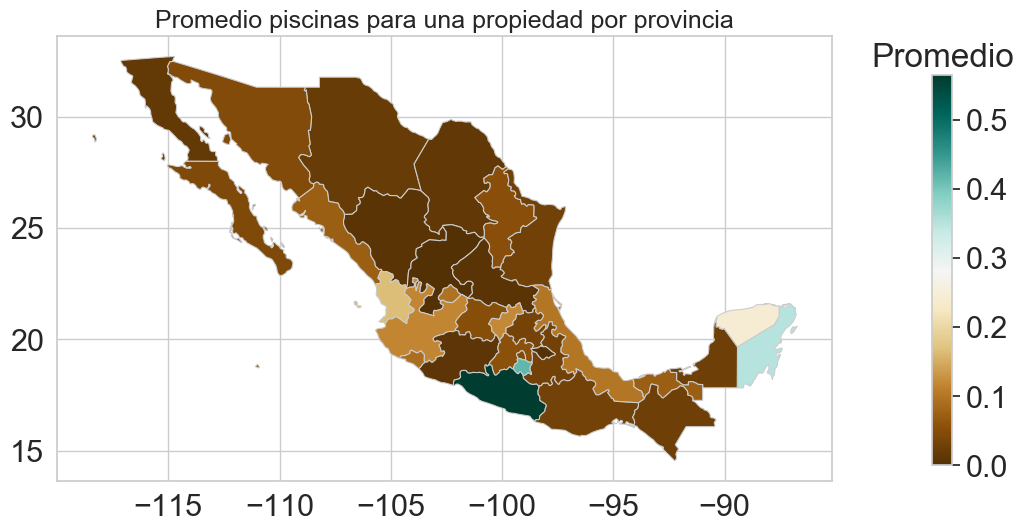

In [37]:
crear_mapa(provincia_promedio_piscina, "piscina", provincia_promedio_piscina.min(),
           provincia_promedio_piscina.max(), "Promedio piscinas para una propiedad por provincia", "Promedio",
           "BrBG")

## ¿Varía en promedio el precio de las propiedades según si tienen piscinas por provincia?

In [22]:
provincias_validas = df["provincia"].value_counts() > 10500
provincias_validas = provincias_validas[provincias_validas == True]
df_reducido = df[df["provincia"].isin(list(provincias_validas.index))]

df_piscina_precio_boolean = crear_df_precio_caracteristica_boolean(df_reducido, "piscina")
df_piscina_precio_boolean

,provincias,piscina,precio
0,Distrito Federal,True,"5,333,005.50"
1,Distrito Federal,False,"3,384,643.50"
2,Jalisco,True,"3,277,998.50"
3,Jalisco,False,"2,247,232.00"
4,Edo. de México,True,"4,712,864.00"
5,Edo. de México,False,"2,646,762.75"
6,Nuevo León,True,"4,512,094.00"
7,Nuevo León,False,"2,616,443.50"
8,Querétaro,True,"2,296,456.75"
9,Querétaro,False,"2,123,155.25"


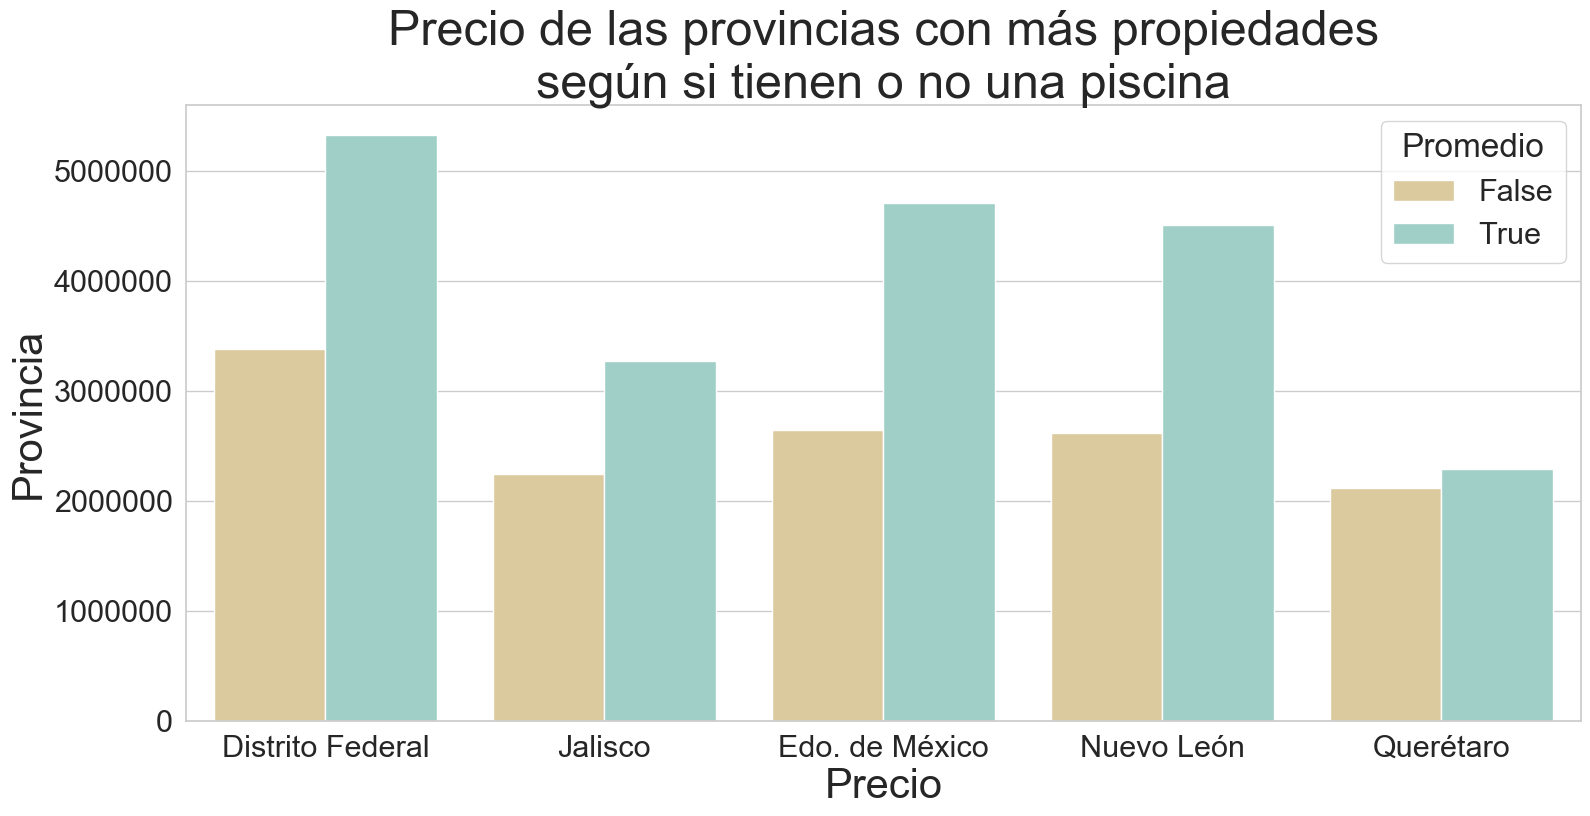

In [23]:
crear_plot(df_piscina_precio_boolean, "provincias", "precio", "piscina", "BrBG",
           "Precio de las provincias con más propiedades\nsegún si tienen o no una piscina", "Promedio",
           "Precio", "Provincia")

## ¿Las provincias con propiedades más caras poseen mayor promedio de piscinas por propiedad?

In [26]:
provincia_precio_piscina_promedio = df.groupby("provincia").agg({"precio": "mean", "piscina": "mean"})
provincia_precio_piscina_promedio

,precio,piscina
provincia,,
Aguascalientes,"1,477,188.75",0.10
Baja California Norte,"767,441.75",0.02
Baja California Sur,"1,216,452.88",0.04
Campeche,"1,570,917.88",0.03
Chiapas,"1,924,125.75",0.03
Chihuahua,"1,744,530.62",0.02
Coahuila,"1,505,305.50",0.01
Colima,"1,531,380.12",0.09
Distrito Federal,"3,471,705.00",0.04


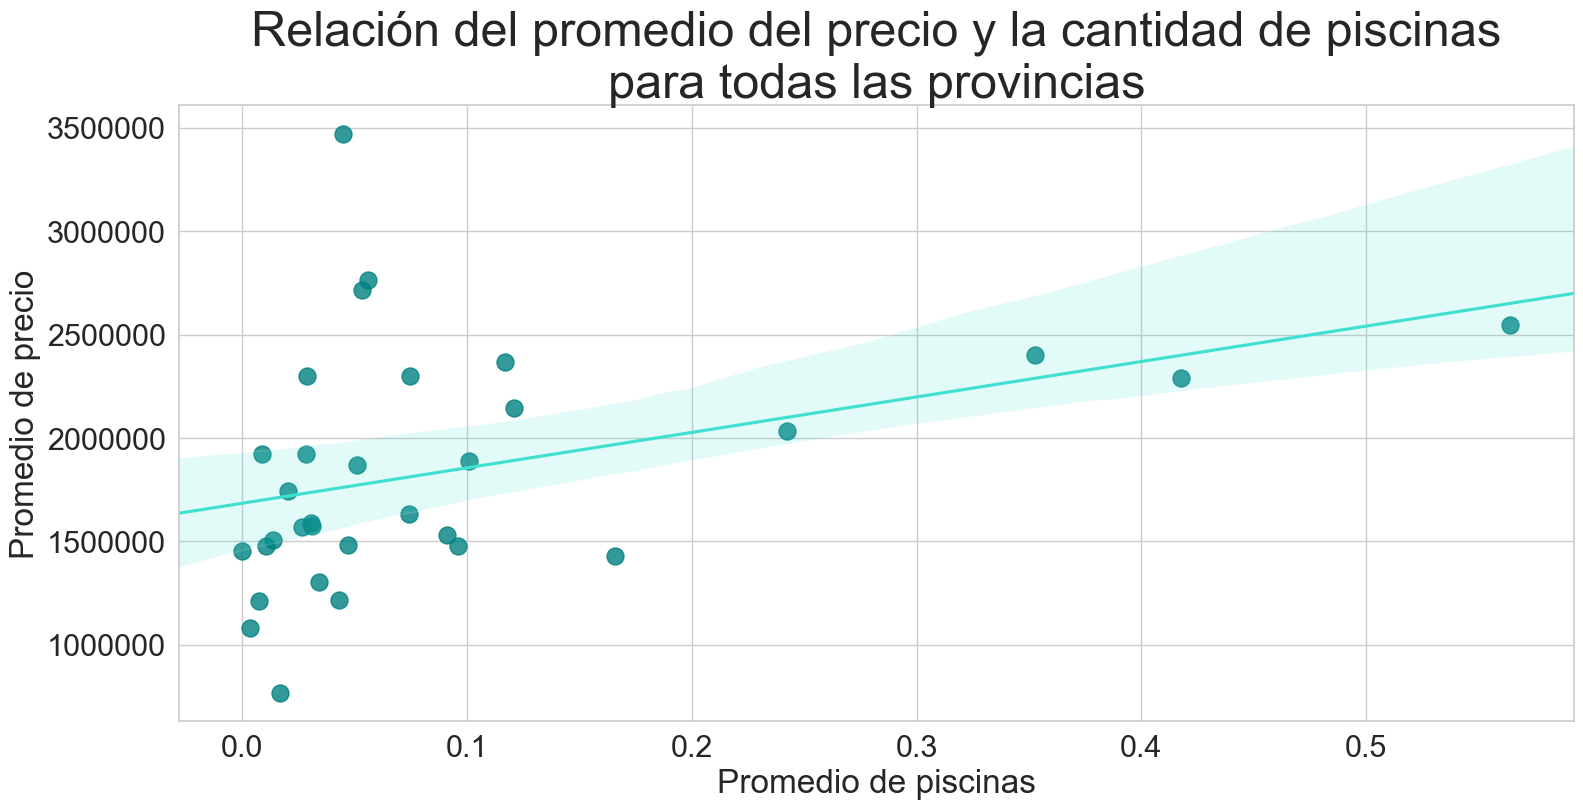

In [30]:
plot_piscina_precio_relacion = sns.regplot(x="piscina", y="precio", data=provincia_precio_piscina_promedio,
                                           scatter_kws={'color': 'teal', 's': 150}, line_kws={'color': 'turquoise'})
plot_piscina_precio_relacion.set(xlabel="Promedio de piscinas", ylabel="Promedio de precio")
plt.title("Relación del promedio del precio y la cantidad de piscinas\npara todas las provincias", size = TAM_TITULO)
plt.show()


# Usos multiples

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en centroscomercialescercanos:

In [31]:
n_usosmultiples_nan = df["usosmultiples"].isnull().sum()
n_usosmultiples_nan

0

## Valores

### ¿Qué valores puede tomar usosmultiples?

In [32]:
usosmultiples_valores = df["usosmultiples"].unique()
usosmultiples_valores.sort()
usosmultiples_valores

array([False,  True])

### ¿Cuál es el promedio de usos multiples para una propiedad por provincia?

In [43]:
provincia_precio_usosmultiples_promedio = df.groupby("provincia")["usosmultiples"].mean()

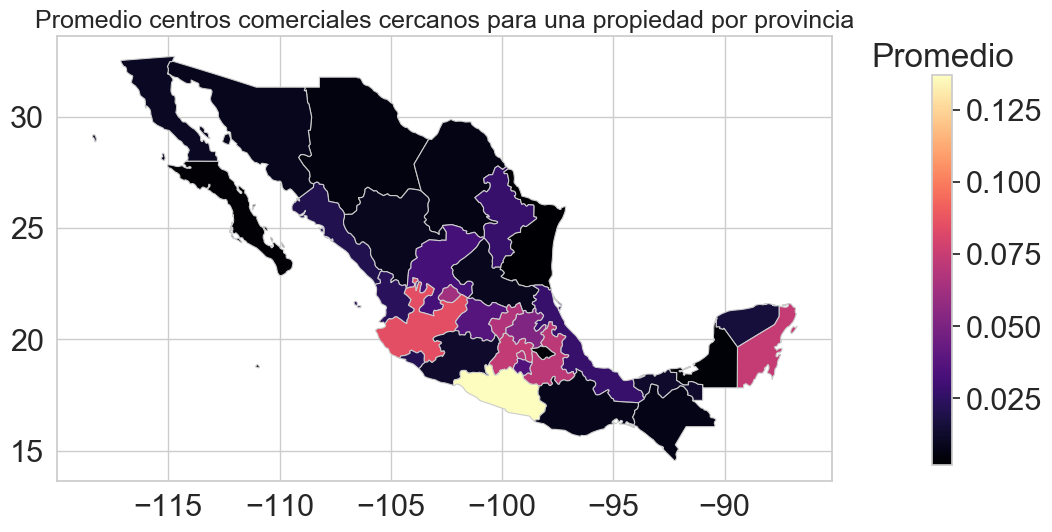

In [41]:
crear_mapa(provincia_precio_usosmultiples_promedio, "usosmultiples", provincia_precio_usosmultiples_promedio.min(),
           provincia_precio_usosmultiples_promedio.max(),
           "Promedio centros comerciales cercanos para una propiedad por provincia", "Promedio", "magma")

## ¿Varía en promedio el precio de las propiedades según si tienen usos multiples por provincia?

In [44]:
df_usosmultiples_precio_boolean = crear_df_precio_caracteristica_boolean(df_reducido, "usosmultiples")
df_usosmultiples_precio_boolean

,provincias,usosmultiples,precio
0,Distrito Federal,True,"4,494,673.00"
1,Distrito Federal,False,"3,396,140.00"
2,Jalisco,True,"3,314,527.25"
3,Jalisco,False,"2,279,642.00"
4,Edo. de México,True,"4,395,164.50"
5,Edo. de México,False,"2,632,855.25"
6,Nuevo León,True,"4,247,108.00"
7,Nuevo León,False,"2,674,449.00"
8,Querétaro,True,"2,486,140.75"
9,Querétaro,False,"2,119,181.25"


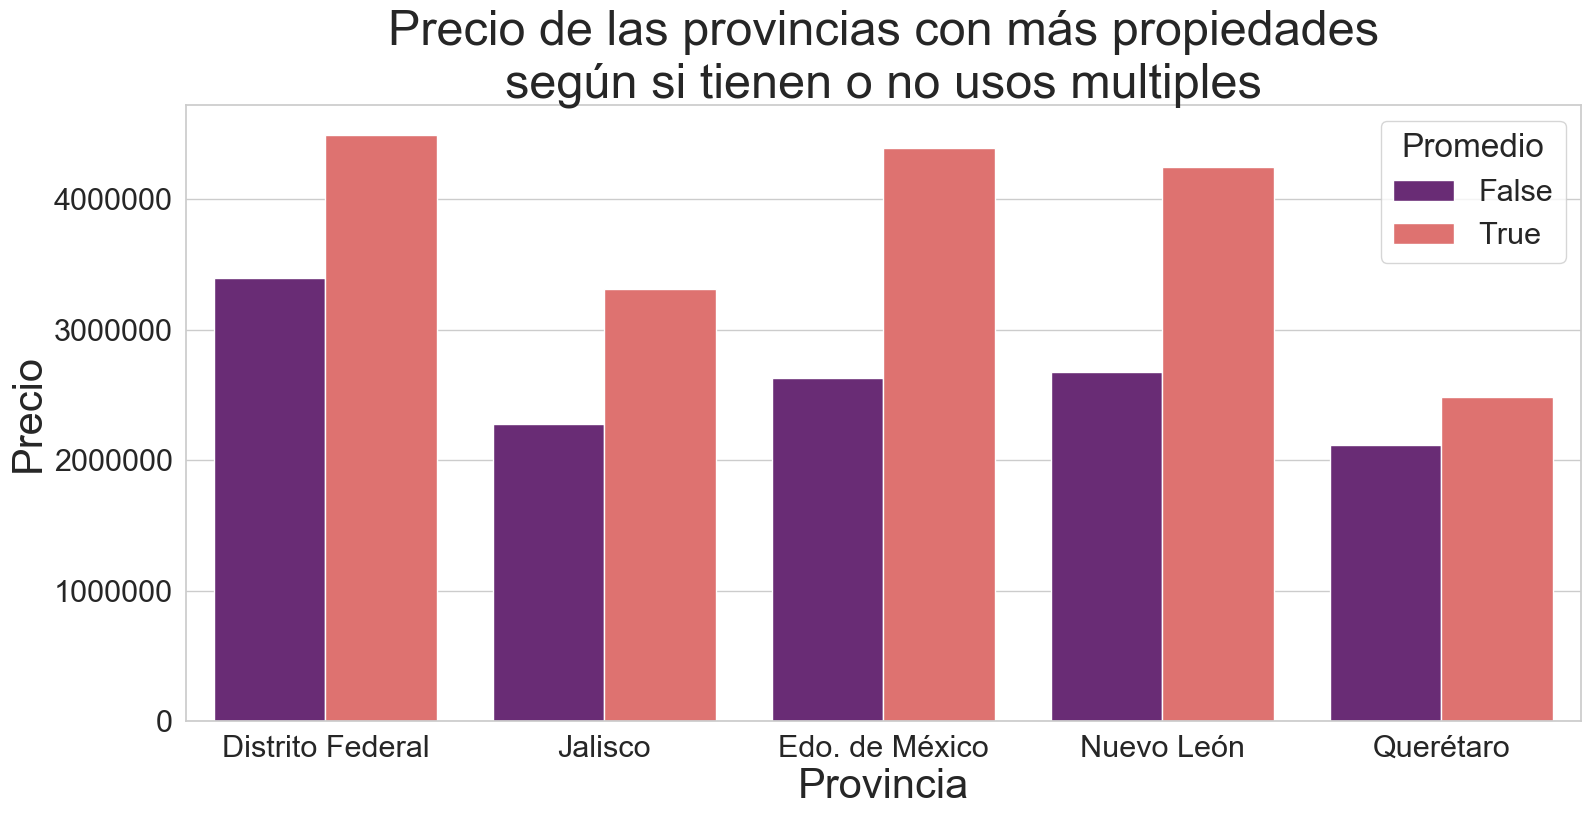

In [46]:
crear_plot(df_usosmultiples_precio_boolean, "provincias", "precio", "usosmultiples", "magma",
           "Precio de las provincias con más propiedades\nsegún si tienen o no usos multiples",
           "Promedio", "Provincia", "Precio")

## ¿Las provincias con propiedades más caras poseen mayor promedio de centros comerciales cercanos por propiedad?

In [49]:
provincia_precio_usosmultiples_promedio = df.groupby("provincia").agg({"precio": "mean", "usosmultiples": "mean"})
provincia_precio_usosmultiples_promedio

,precio,usosmultiples
provincia,,
Aguascalientes,"1,477,188.75",0.06
Baja California Norte,"767,441.75",0.01
Baja California Sur,"1,216,452.88",0.00
Campeche,"1,570,917.88",0.00
Chiapas,"1,924,125.75",0.01
Chihuahua,"1,744,530.62",0.01
Coahuila,"1,505,305.50",0.01
Colima,"1,531,380.12",0.02
Distrito Federal,"3,471,705.00",0.07


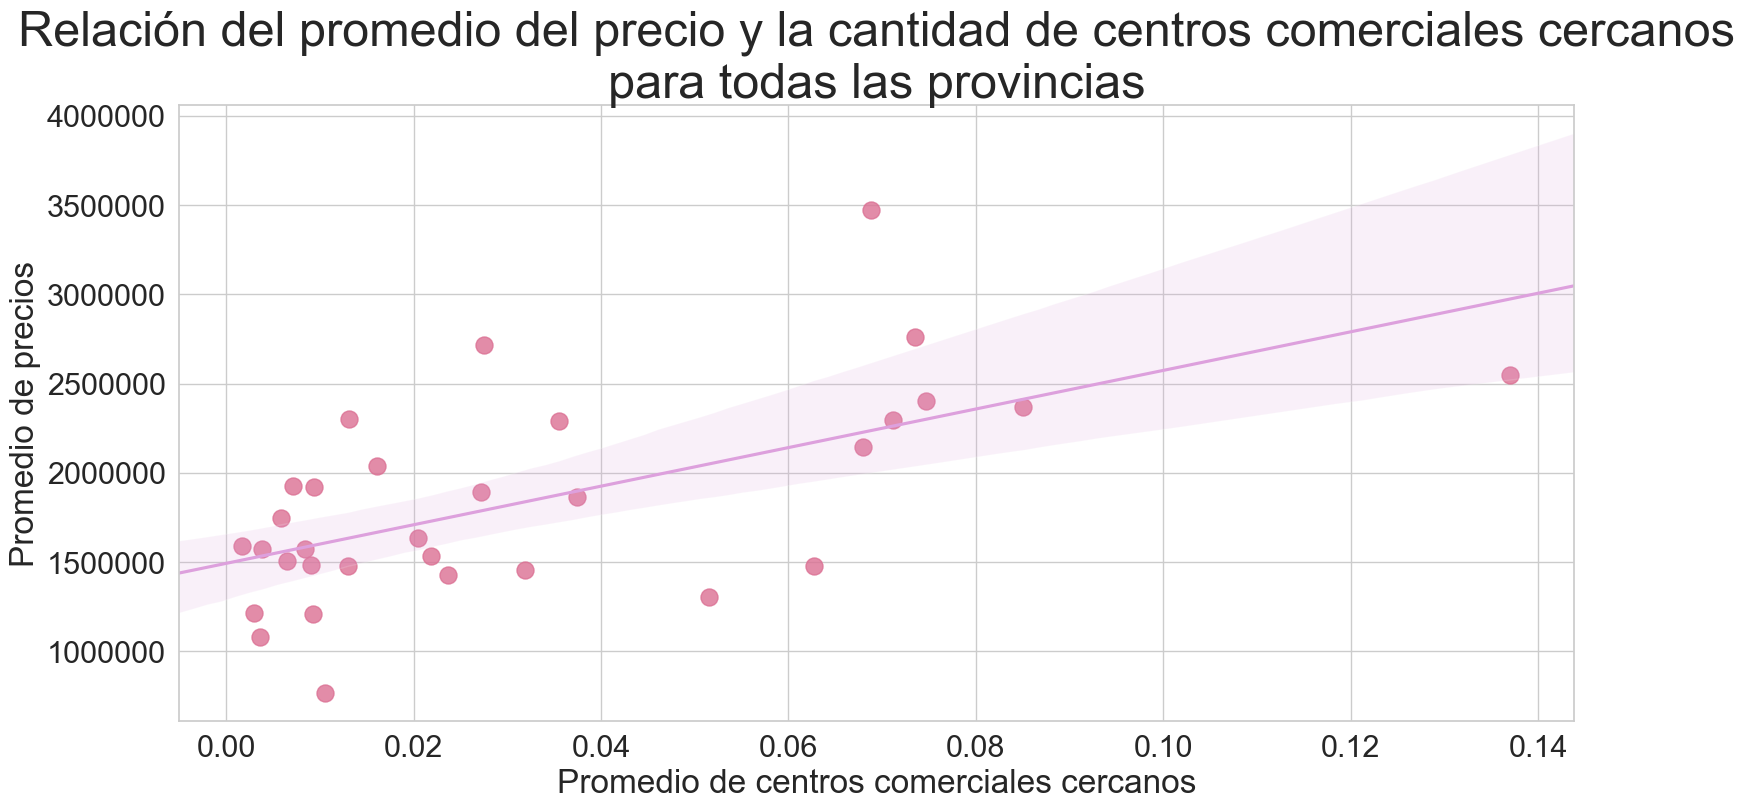

In [55]:
plot_usosmultiples_precio_relacion = sns.regplot(x="usosmultiples", y="precio", data=provincia_precio_usosmultiples_promedio,
                                           scatter_kws={'color': 'palevioletred', 's': 150}, line_kws={'color': 'plum'})
plot_usosmultiples_precio_relacion.set(xlabel="Promedio de centros comerciales cercanos", ylabel="Promedio de precios")
plt.title("Relación del promedio del precio y la cantidad de centros comerciales cercanos\npara todas las provincias", size = TAM_TITULO)
plt.show()

# Gimnasio

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en gimnasio:

In [56]:
n_gimnasio_nan = df["gimnasio"].isnull().sum()
n_gimnasio_nan

0

## Valores

### ¿Qué valores puede tomar gimansio?

In [57]:
gimnasio_valores = df["gimnasio"].unique()
gimnasio_valores.sort()
gimnasio_valores

array([False,  True])

### ¿Cuál es el promedio de gimnasios para una propiedad por provincia?

In [58]:
provincia_precio_gimnasio_promedio = df.groupby("provincia")["gimnasio"].mean()

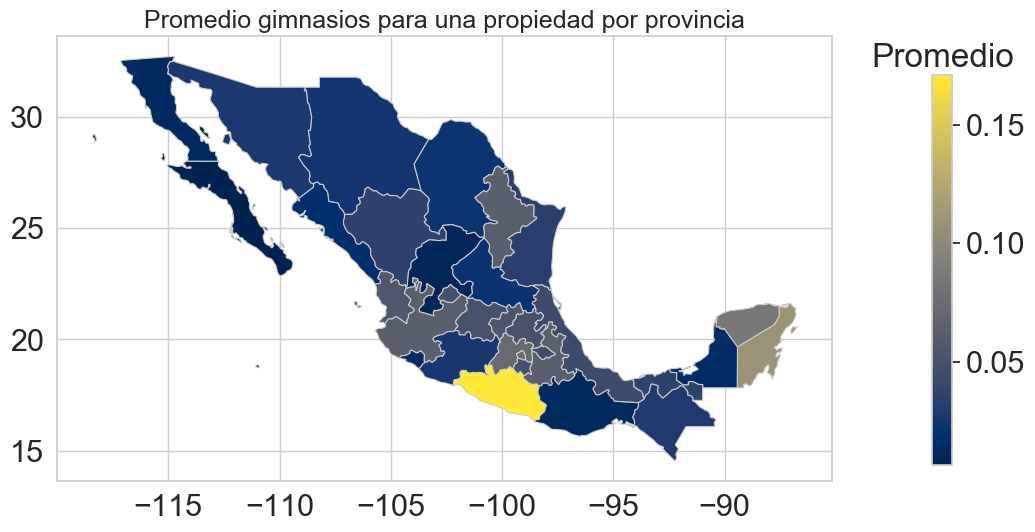

In [69]:
crear_mapa(provincia_precio_gimnasio_promedio, "gimnasio", provincia_precio_gimnasio_promedio.min(),
           provincia_precio_gimnasio_promedio.max(),
           "Promedio gimnasios para una propiedad por provincia", "Promedio", "cividis")

## ¿Varía en promedio el precio de las propiedades según si tienen usos gimnasios por provincia?

In [71]:
df_gimnasio_precio_boolean = crear_df_precio_caracteristica_boolean(df_reducido, "gimnasio")
df_gimnasio_precio_boolean

,provincias,gimnasio,precio
0,Distrito Federal,True,"4,710,750.00"
1,Distrito Federal,False,"3,371,223.50"
2,Jalisco,True,"3,835,011.25"
3,Jalisco,False,"2,268,564.50"
4,Edo. de México,True,"4,338,775.00"
5,Edo. de México,False,"2,637,066.75"
6,Nuevo León,True,"3,423,285.50"
7,Nuevo León,False,"2,670,290.00"
8,Querétaro,True,"2,648,293.75"
9,Querétaro,False,"2,115,008.50"


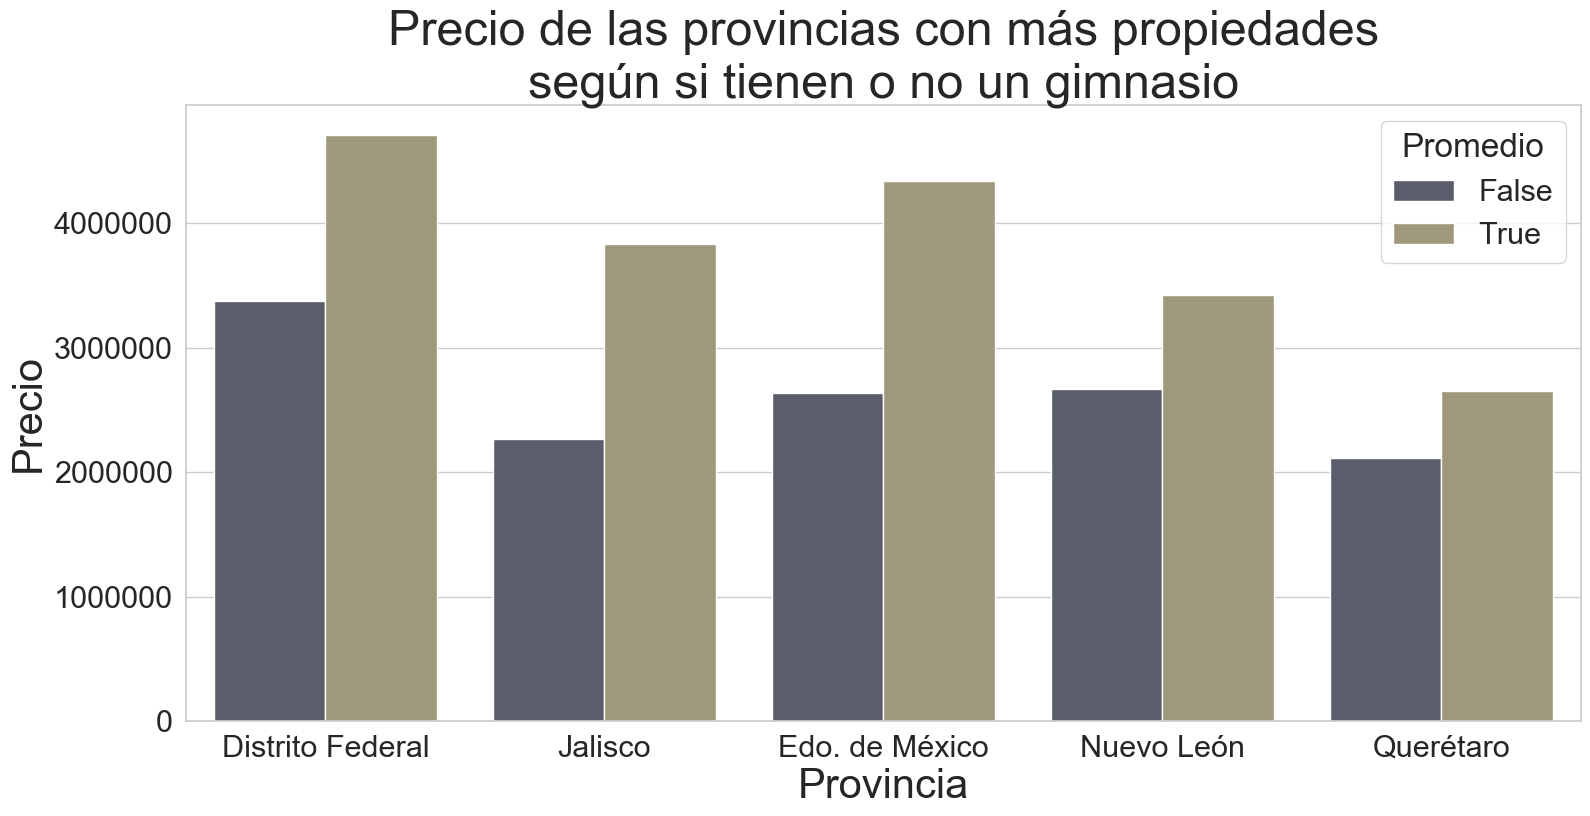

In [74]:
crear_plot(df_gimnasio_precio_boolean, "provincias", "precio", "gimnasio", "cividis",
           "Precio de las provincias con más propiedades\nsegún si tienen o no un gimnasio",
           "Promedio", "Provincia", "Precio")

## ¿Las provincias con propiedades más caras poseen mayor promedio de centros comerciales cercanos por propiedad?

In [75]:
provincia_precio_gimnasio_promedio = df.groupby("provincia").agg({"precio": "mean", "gimnasio": "mean"})
provincia_precio_gimnasio_promedio

,precio,gimnasio
provincia,,
Aguascalientes,"1,477,188.75",0.05
Baja California Norte,"767,441.75",0.01
Baja California Sur,"1,216,452.88",0.01
Campeche,"1,570,917.88",0.02
Chiapas,"1,924,125.75",0.03
Chihuahua,"1,744,530.62",0.03
Coahuila,"1,505,305.50",0.02
Colima,"1,531,380.12",0.01
Distrito Federal,"3,471,705.00",0.08


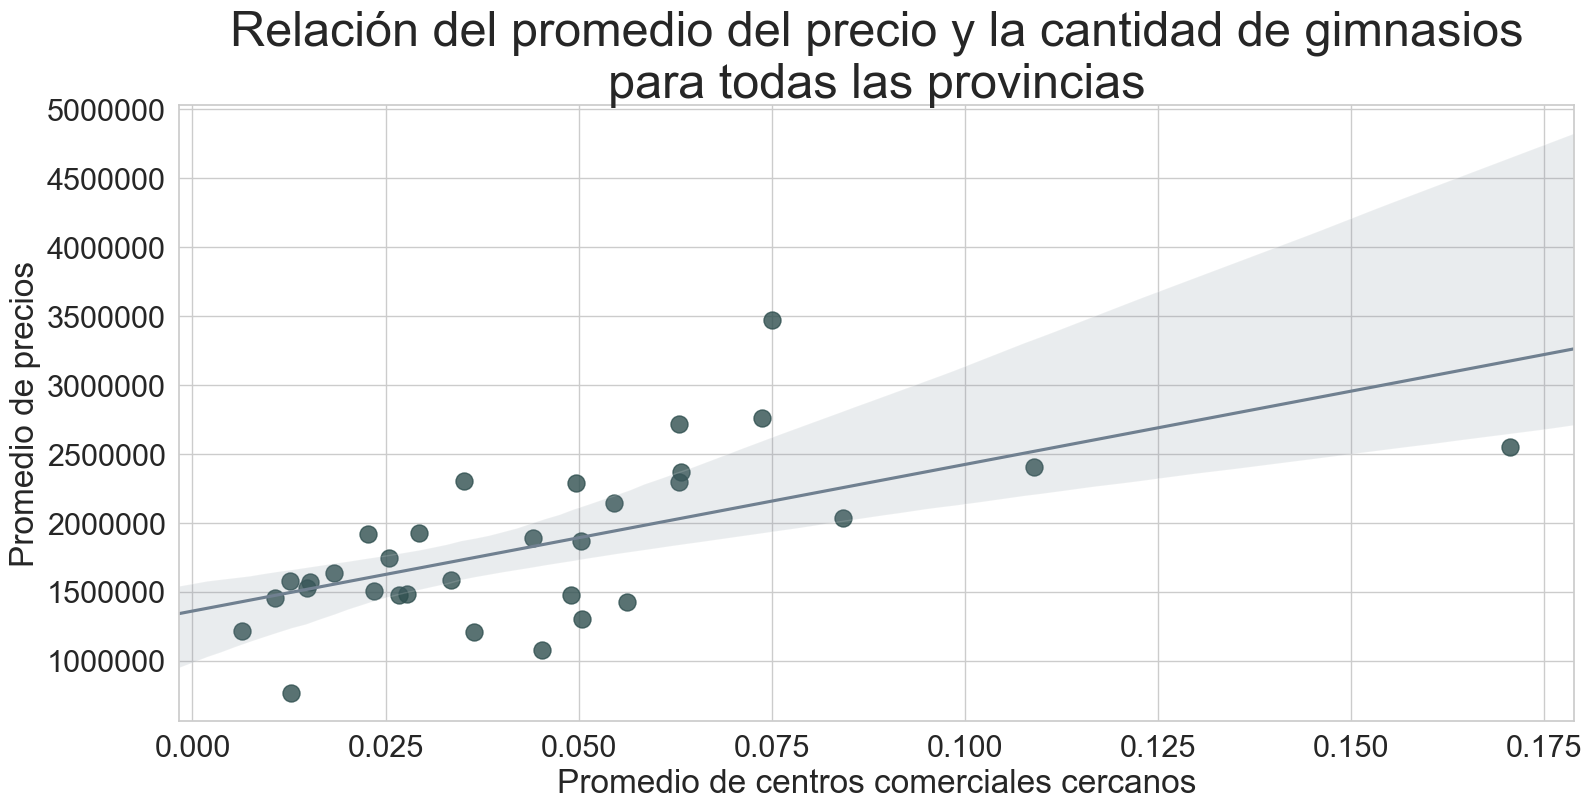

In [80]:
plot_usosmultiples_precio_relacion = sns.regplot(x="gimnasio", y="precio", data=provincia_precio_gimnasio_promedio,
                                           scatter_kws={'color': 'darkslategray', 's': 150}, line_kws={'color': 'slategray'})
plot_usosmultiples_precio_relacion.set(xlabel="Promedio de centros comerciales cercanos", ylabel="Promedio de precios")
plt.title("Relación del promedio del precio y la cantidad de gimnasios\npara todas las provincias", size = TAM_TITULO)
plt.show()